In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [2]:
data = pd.read_csv('bengaluru_house_prices.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
print('No of Rows:',data.shape[0])
print('No of Columns:',data.shape[1])

No of Rows: 13320
No of Columns: 9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [6]:
data.describe(include = object).T

,count,unique,top,freq
area_type,13320,4,Super built-up Area,8790
availability,13320,81,Ready To Move,10581
location,13319,1305,Whitefield,540
size,13304,31,2 BHK,5199
society,7818,2688,GrrvaGr,80
total_sqft,13320,2117,1200,843


In [7]:
# Let's treat the total_sqft first
data['total_sqft']

0                     1056
1                     2600
2                     1440
3                     1521
4                     1200
5                     1170
6                     2732
7                     3300
8                     1310
9                     1020
10                    1800
11                    2785
12                    1000
13                    1100
14                    2250
15                    1175
16                    1180
17                    1540
18                    2770
19                    1100
20                     600
21                    1755
22                    2800
23                    1767
24                     510
25                    1250
26                     660
27                    1610
28                    1151
29                    1025
30             2100 - 2850
31                    1075
32                    1760
33                    1693
34                    1925
35                     700
36                    1070
3

In [8]:
data['total_sqft']= data['total_sqft'].str.split(expand = True).loc[:,0]

In [9]:
data['total_sqft'].value_counts()

1200         848
1100         222
1500         206
2400         197
600          180
1000         173
1350         133
1050         123
1300         118
1250         115
900          112
1400         109
1800         104
1150         102
1600         101
1140          92
2000          84
1450          72
1650          70
800           68
3000          66
1075          66
1020          64
1160          62
2500          62
1125          61
1550          61
1255          60
1180          59
950           59
1700          58
1260          57
1220          55
1080          55
1070          54
750           53
700           53
4000          51
1225          48
1175          48
2100          48
1230          47
1320          46
1240          46
850           45
1210          45
1060          45
1280          42
1270          42
1410          41
1185          41
1750          40
1170          40
1190          40
1330          38
1310          38
1025          38
1290          37
1850          

In [10]:
data['total_sqft'].str.isdigit().sum()

13182

In [11]:
~(data['total_sqft'].str.isdigit().sum())

-13183

In [12]:
data = data[data['total_sqft'].str.isnumeric()]

In [13]:
data.shape

(13182, 9)

In [14]:
data['total_sqft'] = data['total_sqft'].astype(float)

In [15]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [16]:
data.shape

(13182, 9)

In [17]:
# Let's treat the size variable as well
data['size']=data['size'].str.split(expand = True).iloc[:,0]

In [18]:
data['size']=data['size'].astype(float)

In [19]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [20]:
# Drop Society
data['society'].isnull().sum()

5458

In [21]:
del data['society']

In [22]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [23]:
# Let's now treat the column availability
data['availability'].value_counts()

Ready To Move           10488
18-Dec                    296
18-May                    294
18-Apr                    270
18-Aug                    199
19-Dec                    185
18-Jul                    141
18-Mar                    129
20-Dec                     98
18-Jun                     97
21-Dec                     93
19-Mar                     81
18-Feb                     62
18-Nov                     47
18-Jan                     41
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     38
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     20
22-Jun                     19
19-Sep                     19
19-Aug                     18
21-Jun                     17
Immediate Possession       16
20-Aug                     16
19-Apr                     16
19-Oct                     15
21-Mar                     14
17-Jun                     13
17-Nov    

In [24]:
def availability1(s):
    if s in ['Ready To Move','Immediate Possession']:
        return 'Ready to Move'
    else:
        return 'Under Construction'

In [25]:
data['availability'] = data['availability'].apply(availability1)

In [26]:
data['availability'].value_counts()

Ready to Move         10504
Under Construction     2678
Name: availability, dtype: int64

In [27]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready to Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready to Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready to Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready to Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


### Univariate and bivariate analysis

In [28]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [29]:
num_cols = ['size','total_sqft','bath','balcony','price']
cat_cols = ['area_type','availability','location']

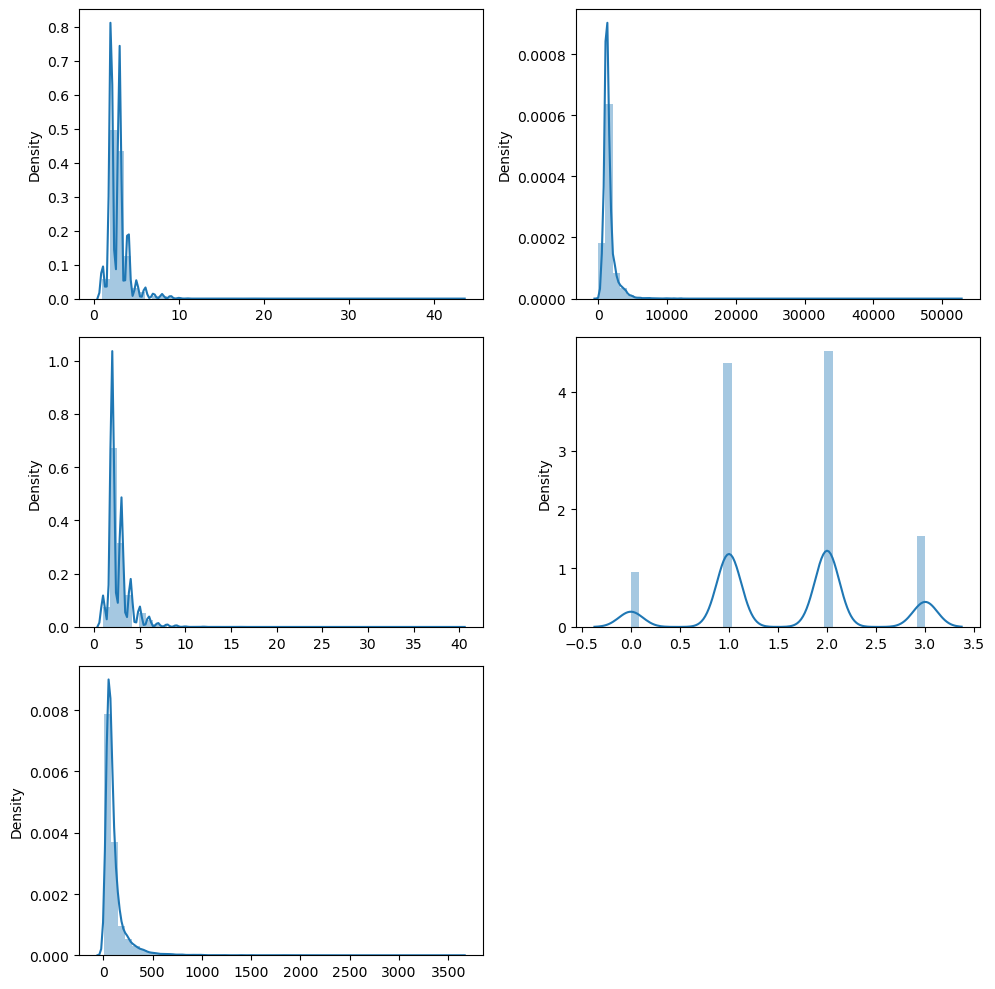

In [30]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(x = data[i])
    t += 1
plt.tight_layout()
plt.show()

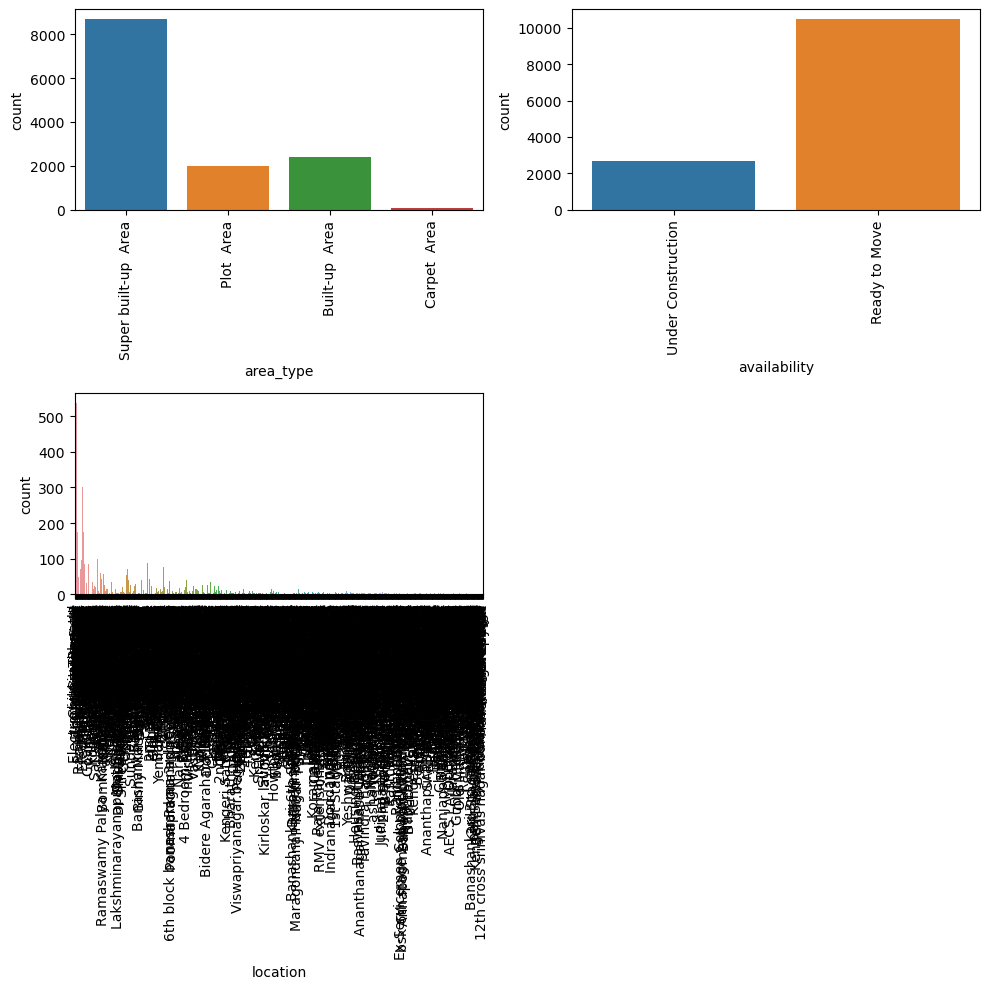

In [31]:
t = 1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(2,2,t)
    sns.countplot(x = data[i])
    plt.xticks(rotation = 90)
    t += 1
plt.tight_layout()
plt.show()

In [32]:
data['location'].value_counts()

Whitefield                                            538
Sarjapur  Road                                        398
Electronic City                                       302
Kanakpura Road                                        266
Thanisandra                                           232
Yelahanka                                             213
Uttarahalli                                           184
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     151
7th Phase JP Nagar                                    148
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                             99
Bellandur     

In [33]:
top_10_location = data.groupby(by = 'location')['price'].mean().sort_values(ascending = False).head(10)

Text(0.5, 1.0, 'Top 10 Locations as per average property Price')

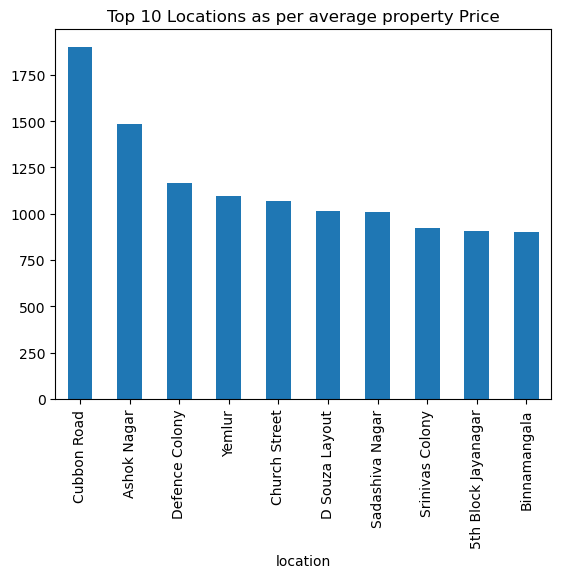

In [34]:
top_10_location.plot(kind = 'bar')
plt.title('Top 10 Locations as per average property Price')

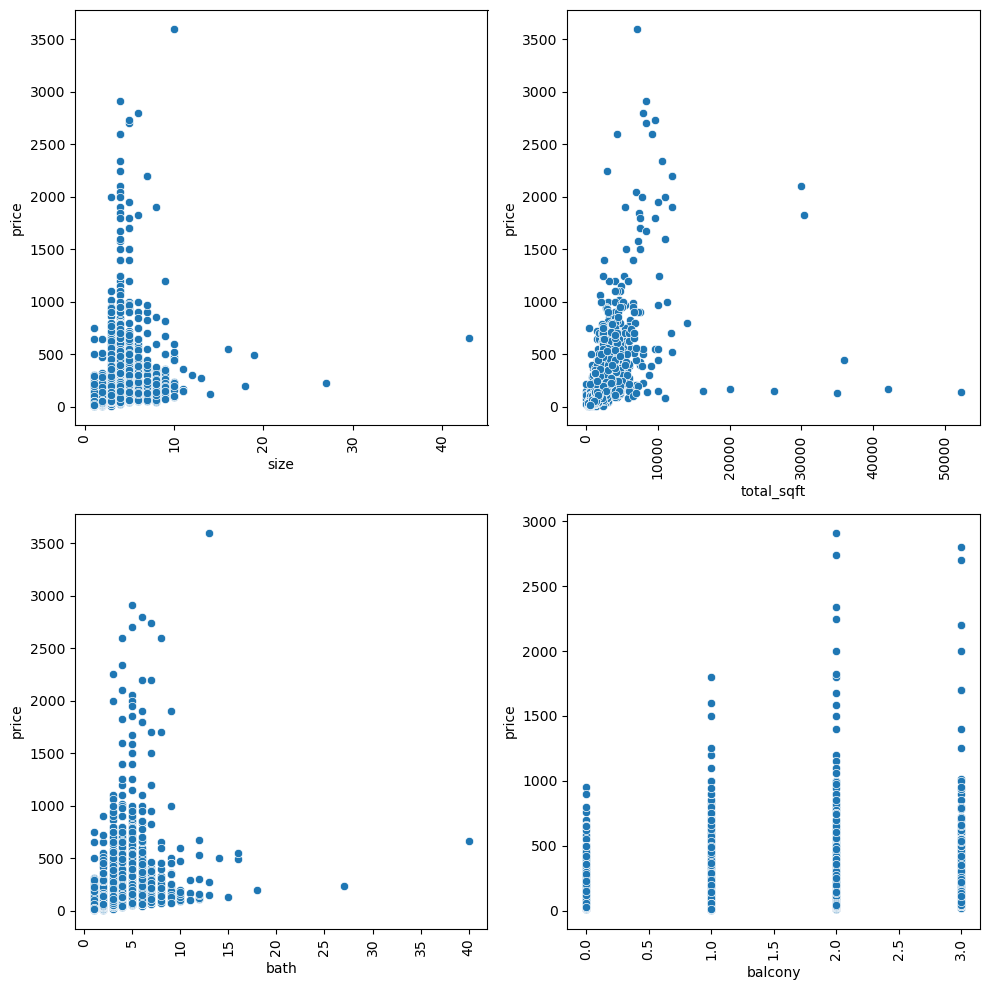

In [35]:
# Bivariate analysis
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    if i != 'price':
        plt.subplot(2,2,t)
        sns.scatterplot(x = data[i],y = data['price'])
        plt.xticks(rotation = 90)
        t += 1
plt.tight_layout()
plt.show()

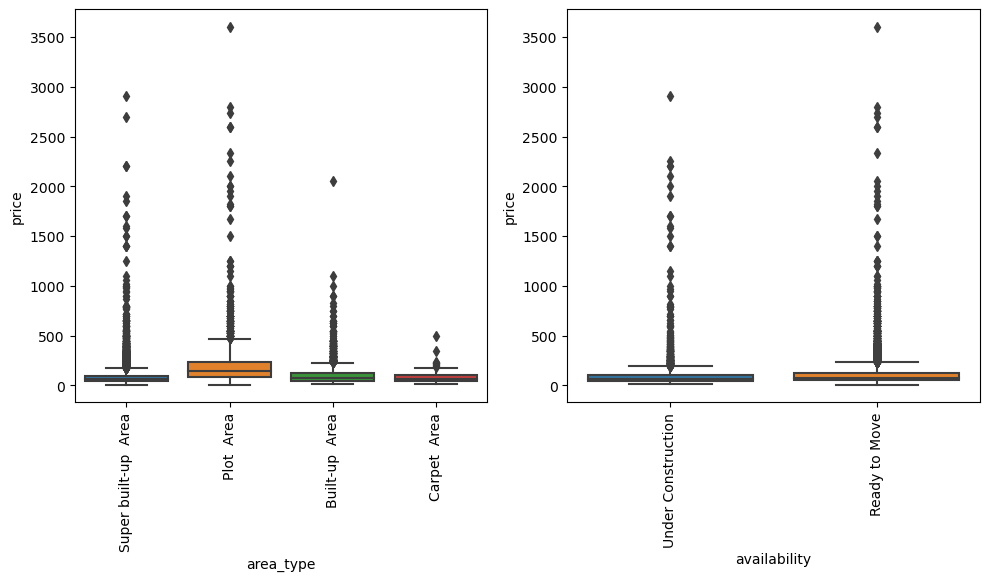

In [36]:
t = 1
plt.figure(figsize=(10,10))
for i in cat_cols:
    if i != 'location':
        plt.subplot(2,2,t)
        sns.boxplot(x = data[i],y = data['price'])
        plt.xticks(rotation = 90)
        t += 1
plt.tight_layout()
plt.show()

<Axes: >

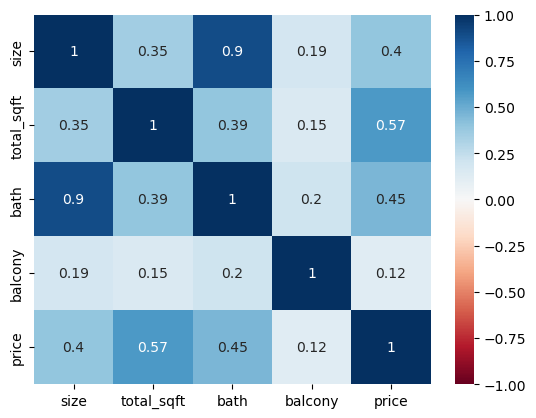

In [37]:
sns.heatmap(data.corr(),vmax = 1, vmin = -1, annot = True, cmap = 'RdBu')

### Data Preprocessing

In [38]:
# treat the missing values

In [39]:
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending = False)

balcony         4.566834
bath            0.538613
size            0.121378
location        0.007586
area_type       0.000000
availability    0.000000
total_sqft      0.000000
price           0.000000
dtype: float64

In [40]:
data[data['location'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,Ready to Move,NaN,3.0,1600.0,3.0,2.0,86.0


In [41]:
data.drop(index = [568],inplace = True)

In [42]:
data[data['size'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
579,Plot Area,Ready to Move,Sarjapur Road,NaN,1200.0,NaN,NaN,34.185
1775,Plot Area,Ready to Move,IVC Road,NaN,2000.0,NaN,NaN,124.000
2264,Plot Area,Ready to Move,Banashankari,NaN,2400.0,NaN,NaN,460.000
2809,Plot Area,Ready to Move,Sarjapur Road,NaN,1200.0,NaN,NaN,28.785
2862,Plot Area,Ready to Move,Devanahalli,NaN,1500.0,NaN,NaN,46.800
5333,Plot Area,Ready to Move,Devanahalli,NaN,2100.0,NaN,NaN,177.115
6423,Plot Area,Ready to Move,Whitefield,NaN,2324.0,NaN,NaN,26.730
6636,Plot Area,Ready to Move,Jigani,NaN,1500.0,NaN,NaN,25.490
6719,Plot Area,Ready to Move,Hoskote,NaN,800.0,NaN,NaN,28.545
7680,Plot Area,Ready to Move,Kasavanhalli,NaN,5000.0,NaN,NaN,400.000


In [43]:
# Let's impute this with mode
data['size'].mode()

0    2.0
Name: size, dtype: float64

In [44]:
data['size'].fillna(data['size'].mode()[0],inplace = True)

In [45]:
data[data['bath'].isnull()]['size'].value_counts()

3.0    24
4.0    20
2.0    17
1.0     7
5.0     3
Name: size, dtype: int64

In [46]:
data['bath'].isnull().sum()

71

In [47]:
data.groupby(by = 'size')['bath'].median()

size
1.0      1.0
2.0      2.0
3.0      3.0
4.0      4.0
5.0      5.0
6.0      6.0
7.0      7.0
8.0      8.0
9.0      9.0
10.0    10.0
11.0    10.0
12.0     6.0
13.0    13.0
14.0    15.0
16.0    16.0
18.0    18.0
19.0    16.0
27.0    27.0
43.0    40.0
Name: bath, dtype: float64

In [48]:
data['bath'] = np.where((data['bath'].isnull())&(data['size']==1),1,data['bath'])
data['bath'] = np.where((data['bath'].isnull())&(data['size']==2),2,data['bath'])
data['bath'] = np.where((data['bath'].isnull())&(data['size']==3),3,data['bath'])
data['bath'] = np.where((data['bath'].isnull())&(data['size']==4),4,data['bath'])
data['bath'] = np.where((data['bath'].isnull())&(data['size']==5),5,data['bath'])

In [49]:
data[data['balcony'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,Under Construction,Old Airport Road,4.0,2732.0,4.0,NaN,204.000
7,Super built-up Area,Ready to Move,Rajaji Nagar,4.0,3300.0,4.0,NaN,600.000
9,Plot Area,Ready to Move,Gandhi Bazar,6.0,1020.0,6.0,NaN,370.000
34,Built-up Area,Ready to Move,Kasturi Nagar,3.0,1925.0,3.0,NaN,125.000
40,Built-up Area,Ready to Move,Murugeshpalya,2.0,1296.0,2.0,NaN,81.000
45,Plot Area,Ready to Move,HSR Layout,8.0,600.0,9.0,NaN,200.000
56,Built-up Area,Under Construction,Devanahalli,4.0,3010.0,4.0,NaN,192.000
81,Built-up Area,Under Construction,Hennur Road,4.0,2957.0,4.0,NaN,224.500
140,Built-up Area,Ready to Move,Hennur Road,8.0,5000.0,8.0,NaN,250.000
146,Super built-up Area,Ready to Move,Kothanur,3.0,1828.0,3.0,NaN,110.000


In [50]:
data['balcony'].isnull().sum()

602

In [51]:
data.groupby(by = 'size')['balcony'].median()

size
1.0     1.0
2.0     1.0
3.0     2.0
4.0     2.0
5.0     2.0
6.0     2.0
7.0     2.0
8.0     2.0
9.0     2.0
10.0    3.0
11.0    3.0
12.0    2.0
13.0    0.0
14.0    0.0
16.0    NaN
18.0    NaN
19.0    NaN
27.0    0.0
43.0    0.0
Name: balcony, dtype: float64

In [52]:
data['balcony'].fillna(2,inplace = True)

In [53]:
data['balcony'].isnull().sum()

0

In [54]:
# Treat Outliers

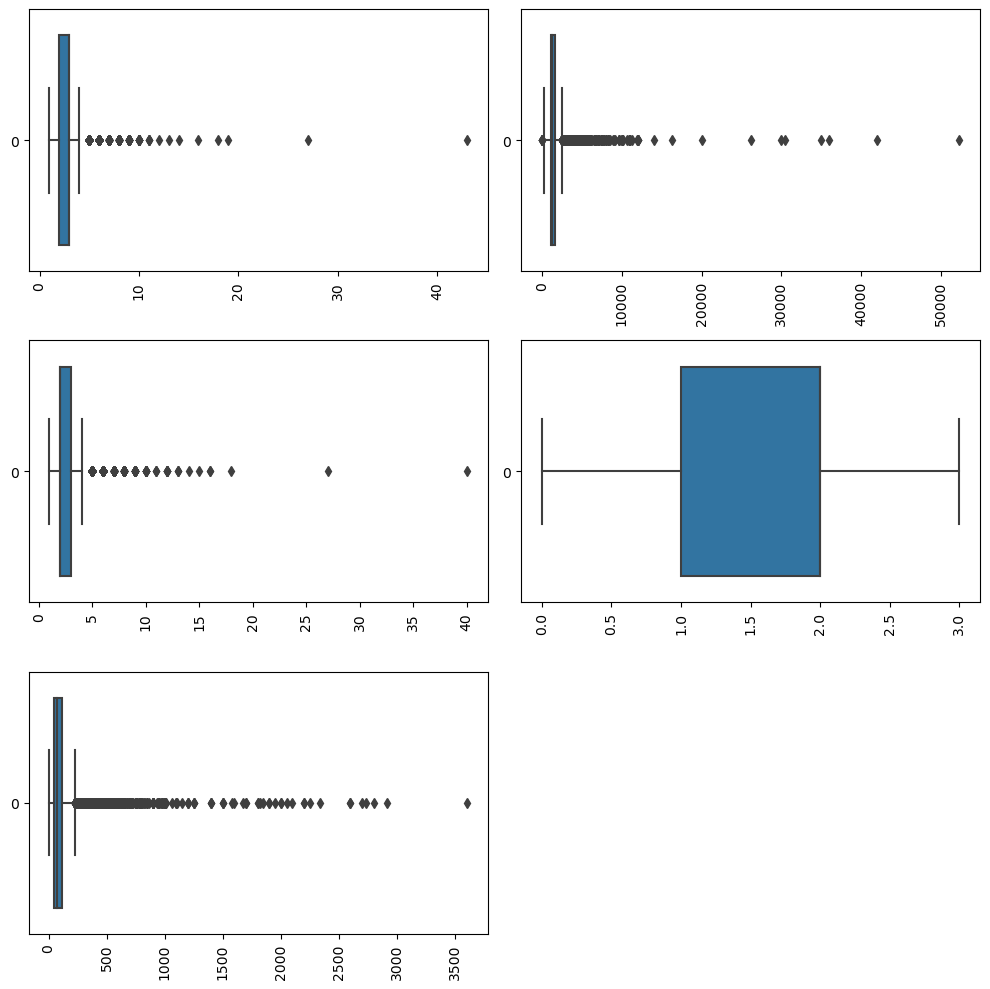

In [55]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient = 'h')
    plt.xticks(rotation = 90)
    t += 1
plt.tight_layout()
plt.show()

In [56]:
num_cols

['size', 'total_sqft', 'bath', 'balcony', 'price']

In [57]:
# drop the extreme values(values greater than 99th Percentile)
outlier_cols = ['size', 'total_sqft', 'bath', 'price']

p_99 = data[outlier_cols].quantile(0.99)

In [58]:
p_99

size             8.0
total_sqft    5000.0
bath             8.0
price          660.0
Name: 0.99, dtype: float64

In [59]:
data = data[~(data[outlier_cols]>p_99).any(axis = 1)]

In [60]:
data.shape

(12902, 8)

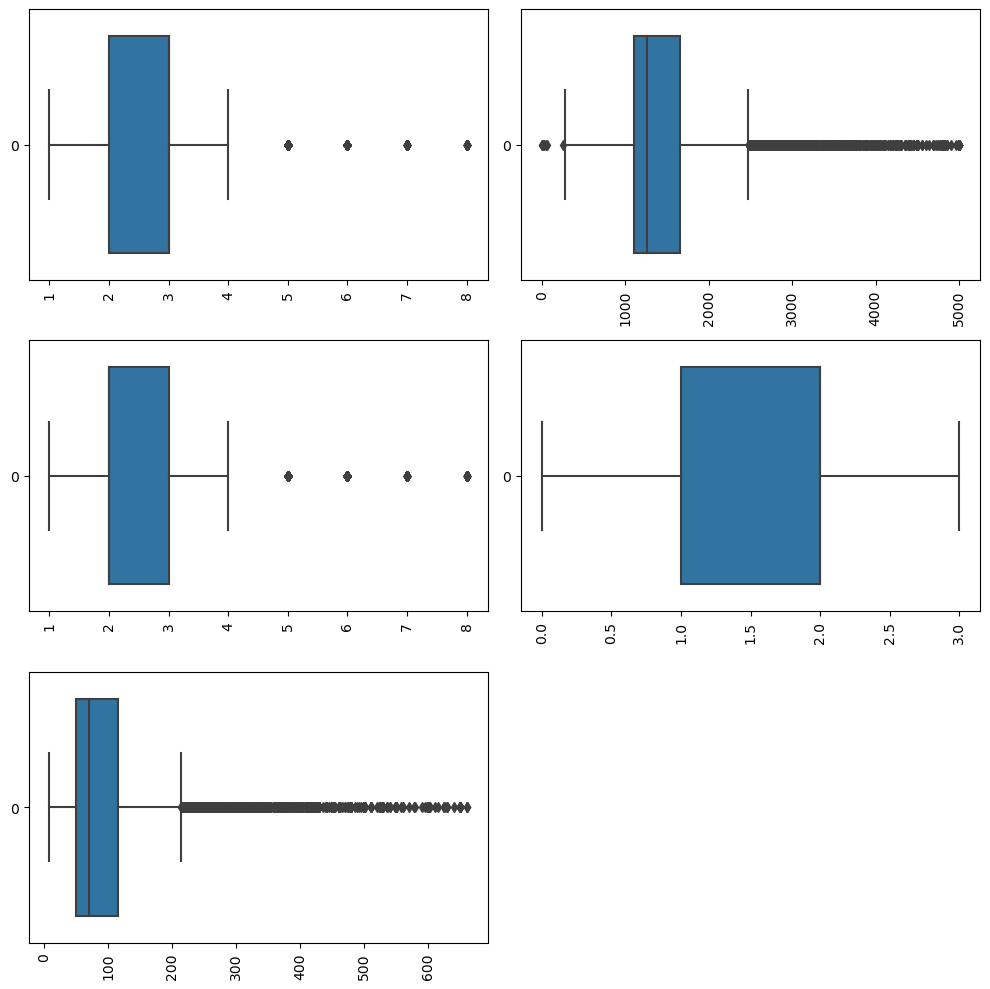

In [61]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient = 'h')
    plt.xticks(rotation = 90)
    t += 1
plt.tight_layout()
plt.show()

### Encoding

In [62]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Under Construction,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready to Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready to Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready to Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready to Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [63]:
#import category_encoders as ce

In [64]:
#cat_encoder = ce.cat_boost.CatBoostEncoder()

In [65]:
#data['location'] = cat_encoder.fit_transform(data['location'],data['price'])

In [66]:
data['availability'] = np.where(data['availability']=='Ready to Move',1,0)

In [67]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [68]:
top_10_properties = data.groupby(by = 'location')['price'].mean().sort_values(ascending = False).head(10)

In [69]:
top_10_properties.index

Index(['6th block banashankari 3rd stage, 100 feet ORR',
       '1A Block Koramangala', 'Indiranagar HAL 2nd Stage', 'Richmond Road',
       'Koramangala Industrial Layout', 'Sadashiva Nagar', 'Rahat Bagh',
       '2nd Block Koramangala', 'Church Street', 'Race Course Road'],
      dtype='object', name='location')

In [70]:
def location(s):
    if s in top_10_properties.index:
        return 1
    else:
        return 0


In [71]:
data['location'] = data['location'].apply(location)

In [72]:
data.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,0,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,1,0,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,1,0,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,1,0,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,1,0,2.0,1200.0,2.0,1.0,51.00
5,Super built-up Area,1,0,2.0,1170.0,2.0,1.0,38.00
6,Super built-up Area,0,0,4.0,2732.0,4.0,2.0,204.00
7,Super built-up Area,1,0,4.0,3300.0,4.0,2.0,600.00
8,Super built-up Area,1,0,3.0,1310.0,3.0,1.0,63.25
9,Plot Area,1,0,6.0,1020.0,6.0,2.0,370.00


In [73]:
data = pd.get_dummies(data,drop_first = True)

In [74]:
data.head()

,availability,location,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,0,2.0,1056.0,2.0,1.0,39.07,0,0,1
1,1,0,4.0,2600.0,5.0,3.0,120.00,0,1,0
2,1,0,3.0,1440.0,2.0,3.0,62.00,0,0,0
3,1,0,3.0,1521.0,3.0,1.0,95.00,0,0,1
4,1,0,2.0,1200.0,2.0,1.0,51.00,0,0,1


### Predictive Modelling

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [76]:
def model_validation(xtrain,ytrain,xtest,ytest,model):
    global m
    m = model
    m.fit(xtrain,ytrain)
    
    print('Training Scores')
    pred = m.predict(xtrain)
    print('R-Squared:',r2_score(ytrain,pred))
    print('MSE:',mean_squared_error(ytrain,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_train,pred)))
    print('MAPE:',mean_absolute_percentage_error(ytrain,pred))
    
    
    
    print('\nTest Scores')
    pred = m.predict(xtest)
    print('R-Squared:',r2_score(ytest,pred))
    print('MSE:',mean_squared_error(ytest,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
    print('MAPE:',mean_absolute_percentage_error(ytest,pred))

In [77]:
# Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x = data.drop(columns=['price'])
y = data['price']

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state = 1)

In [81]:
# Linear Regression

In [82]:
model_validation(x_train,y_train,x_test,y_test,LinearRegression())

Training Scores
R-Squared: 0.6401256411326262
MSE: 2763.6114056910797
RMSE: 52.5700618764243
MAPE: 0.34799560032126625

Test Scores
R-Squared: 0.6570984039611146
MSE: 2521.6765869157152
RMSE: 50.21629802081905
MAPE: 0.3531718277108158


In [83]:
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,availability,4.893532
1,location,290.874716
2,size,-2.858363
3,total_sqft,0.081298
4,bath,11.332204
5,balcony,-0.902968
6,area_type_Carpet Area,9.687529
7,area_type_Plot Area,62.534323
8,area_type_Super built-up Area,0.725916


In [84]:
# Lasso
model_validation(x_train,y_train,x_test,y_test,Lasso(alpha = 0.005))

Training Scores
R-Squared: 0.640122158944554
MSE: 2763.6381467312117
RMSE: 52.57031621296577
MAPE: 0.3480221028943688

Test Scores
R-Squared: 0.6570158061505563
MSE: 2522.2840059753566
RMSE: 50.222345683722864
MAPE: 0.3532253768776201


In [85]:
# coefficients of Lasso
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,availability,4.848289
1,location,286.849086
2,size,-2.825661
3,total_sqft,0.081317
4,bath,11.300078
5,balcony,-0.892730
6,area_type_Carpet Area,8.706874
7,area_type_Plot Area,62.412977
8,area_type_Super built-up Area,0.625788


In [86]:
# Ridge
model_validation(x_train,y_train,x_test,y_test,Ridge(alpha = 0.5))

Training Scores
R-Squared: 0.640106344828748
MSE: 2763.759589311756
RMSE: 52.57147124925986
MAPE: 0.3480651405683478

Test Scores
R-Squared: 0.6569110938033721
MSE: 2523.0540539346125
RMSE: 50.230011486506875
MAPE: 0.3532364022734131


In [87]:
# coefficients of Ridge
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,availability,4.886538
1,location,279.960559
2,size,-2.866903
3,total_sqft,0.081366
4,bath,11.329379
5,balcony,-0.908562
6,area_type_Carpet Area,9.573376
7,area_type_Plot Area,62.500403
8,area_type_Super built-up Area,0.692447


In [88]:
# ElasticNet
model_validation(x_train,y_train,x_test,y_test,ElasticNet(alpha = 0.01, l1_ratio = 0.01))

Training Scores
R-Squared: 0.6287447424941084
MSE: 2851.0096337377
RMSE: 53.39484650916884
MAPE: 0.3501027760290324

Test Scores
R-Squared: 0.6430771942921457
MSE: 2624.7876734516485
RMSE: 51.23268169295502
MAPE: 0.35425410006742325


In [89]:
# coefficients of ElasticNet
pd.DataFrame({'Features':x.columns,'Coef':m.coef_})

,Features,Coef
0,availability,4.440404
1,location,32.481411
2,size,-2.165892
3,total_sqft,0.082337
4,bath,11.197655
5,balcony,-1.216414
6,area_type_Carpet Area,2.299586
7,area_type_Plot Area,54.920902
8,area_type_Super built-up Area,-2.377357


### Feature Selection

In [90]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [91]:
sfs = SequentialFeatureSelector(estimator=LinearRegression(),
                               k_features='best',
                               scoring='r2')

In [92]:
sfs.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 9),
                          scoring='r2')

In [93]:
k = list(sfs.k_feature_names_)

In [94]:
model_validation(x_train[k],y_train,x_test[k],y_test,LinearRegression())

Training Scores
R-Squared: 0.6398173947572983
MSE: 2765.9785462711975
RMSE: 52.59257120802516
MAPE: 0.34940979764445

Test Scores
R-Squared: 0.6567541760927986
MSE: 2524.208016824831
RMSE: 50.241496960429345
MAPE: 0.35369877430864255


### Task: Improve the prediction of the model

#### Try different approach in Encoding
#### Try different technique of missing value treatment
#### Use some Advance models for the prediction

In [95]:
# Let's take Linear Regression model as the final model

In [96]:
model_validation(x_train,y_train,x_test,y_test,LinearRegression())

Training Scores
R-Squared: 0.6401256411326262
MSE: 2763.6114056910797
RMSE: 52.5700618764243
MAPE: 0.34799560032126625

Test Scores
R-Squared: 0.6570984039611146
MSE: 2521.6765869157152
RMSE: 50.21629802081905
MAPE: 0.3531718277108158


In [97]:
m.feature_names_in_

array(['availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area'], dtype=object)

In [99]:
m.predict([[1,0,3,1500,2,2,1,0,0]])

array([95.17309399])

In [100]:
# Save the trained Model

In [101]:
import pickle

In [102]:
with open('model_lr.pkl','wb') as file:
    pickle.dump(m,file)
    
print('The file has been saved')

The file has been saved
